# Introdução de Python para Geoprocessamento

### 1. Importando bibliotecas

In [65]:
#Instalando a biblioteca pandas
!pip install geopandas
!pip install matplotlib
!pip intall shapely

!pip install descartes

ERROR: unknown command "intall" - maybe you meant "install"



In [10]:
#Versão das bibliotecas
!conda list geopandas
!conda list matplotlib

# packages in environment at C:\Users\Rodrigo Cruz\anaconda3\envs\geopython:
#
# Name                    Version                   Build  Channel
geopandas                 0.13.2                   pypi_0    pypi
# packages in environment at C:\Users\Rodrigo Cruz\anaconda3\envs\geopython:
#
# Name                    Version                   Build  Channel
matplotlib                3.7.2                    pypi_0    pypi
matplotlib-inline         0.1.6              pyhd8ed1ab_0    conda-forge


In [66]:
#Importação das bibliotecas
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point,LineString, Polygon

### 2. Baixando dados geoespaciais

Link: https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html

### 3. Lendo arquivos

In [13]:
# ler dados geopandas

data = gpd.read_file('data/PA_Municipios_2022/PA_Municipios_2022.shp')

In [14]:
# tipo de dados

type(data)

geopandas.geodataframe.GeoDataFrame

In [15]:
# dados da tabela de atributos
data.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1500107,Abaetetuba,PA,1610.654,"POLYGON ((-48.91969 -1.94722, -48.91996 -1.946..."
1,1500131,Abel Figueiredo,PA,614.131,"POLYGON ((-48.39828 -4.86941, -48.39526 -4.870..."
2,1500206,Acará,PA,4344.384,"POLYGON ((-48.36255 -1.47566, -48.36046 -1.473..."
3,1500305,Afuá,PA,8338.438,"POLYGON ((-50.58316 -0.66965, -50.58467 -0.669..."
4,1500347,Água Azul do Norte,PA,7113.955,"POLYGON ((-50.53100 -7.14231, -50.53114 -7.142..."


### 4. Visualização dos dados geoespaciais

<Axes: >

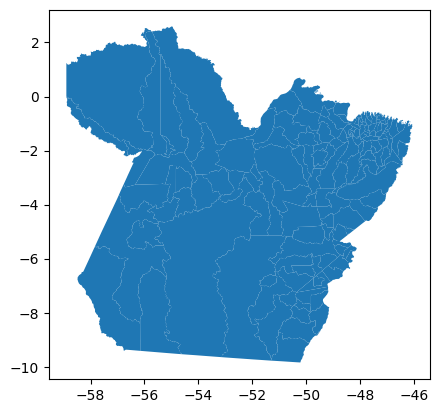

In [17]:
#plotando o mapa
data.plot()

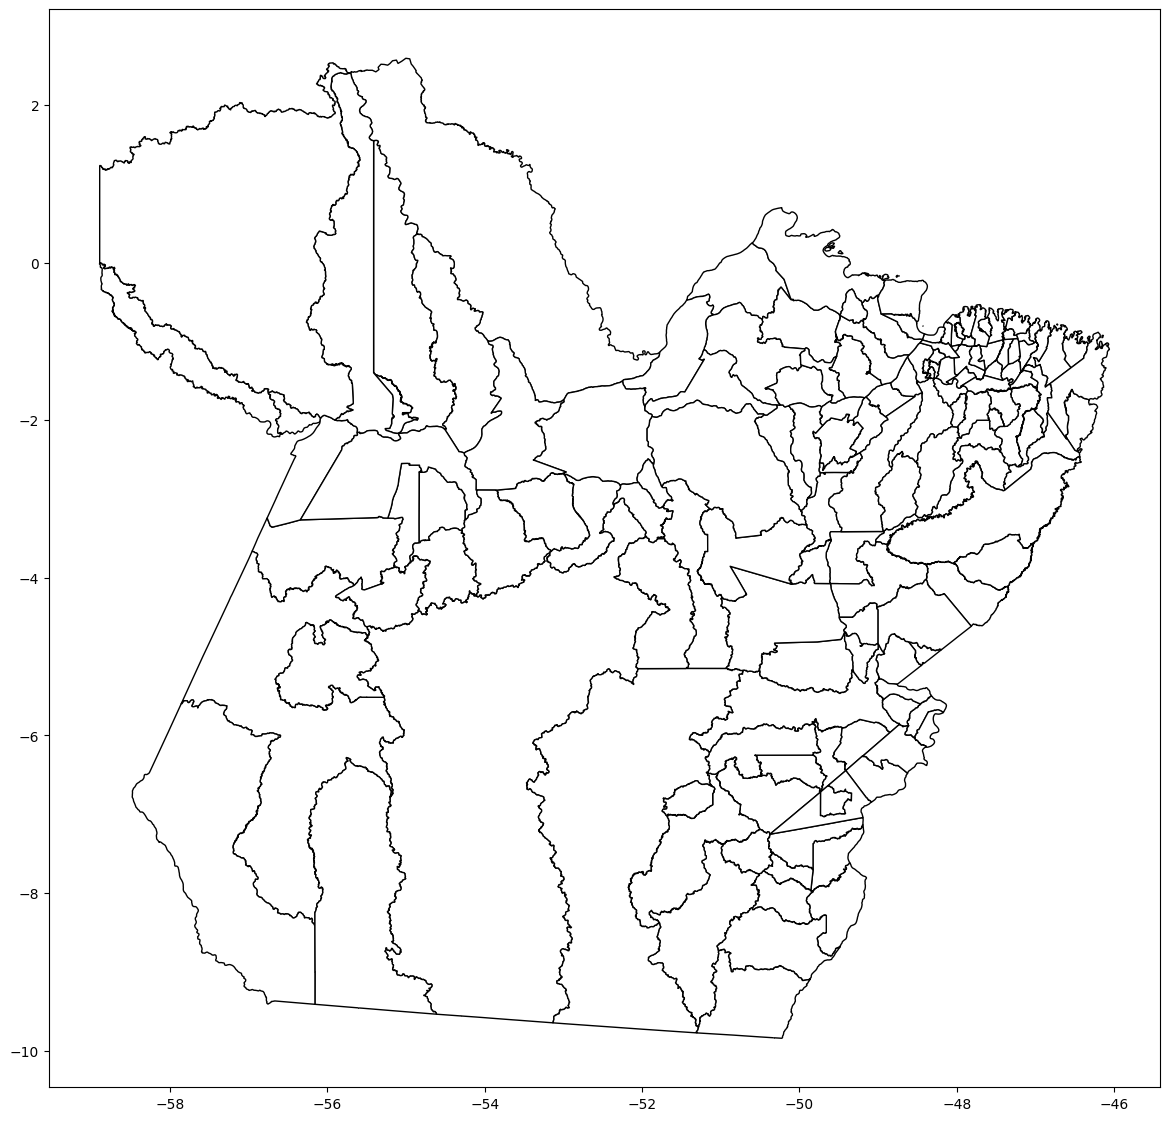

In [20]:
# editando a visualização
data.plot(figsize=(16,14), facecolor='w', edgecolor='black')
plt.show()

In [56]:
# filtrar somente a capital de Belém
cap_bel = data[data.NM_MUN == 'Belém']

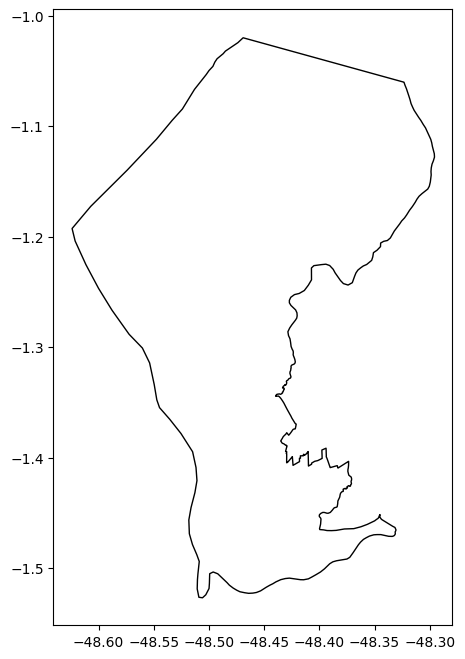

In [57]:
# visualizar apenas a capital filtrada
cap_bel.plot(figsize=(8,8), facecolor = 'w', edgecolor='black')
plt.show()

#### Salvando os dados

In [60]:
# para salvar os dados geoespaciais
# geojson
filename = "data/_Saved/capital_belem.json"
cap_bel.to_file(filename, driver='GeoJSON')

<Axes: >

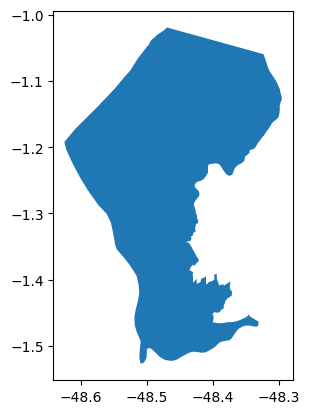

In [64]:
#Abrindo arquivos

bel = gpd.read_file(filename, driver='GeoJSON')

bel.plot()

### 6. Criando geometrias

#### 6.1. Point (Ponto)

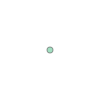

In [69]:
#Criando geometria do tipo ponto
ponto = Point(5,10)
ponto

In [70]:
# Tipo da variavel
print(ponto, type(ponto))

POINT (5 10) <class 'shapely.geometry.point.Point'>


In [72]:
#Funçao coords
list(ponto.coords)

[(5.0, 10.0)]

In [73]:
# lendo x e y separadamente
x = ponto.x
y = ponto.y

print(x,y)

5.0 10.0


In [75]:
# Como calcular a distancia entre dois pontos
point1 = Point(2,4)
point2 = Point(7,9)

distancia = point1.distance(point2)

print(f'A distancia entre dois pontos é: {distancia}')

A distancia entre dois pontos é: 7.0710678118654755


#### 6.2. LineString (Linha)

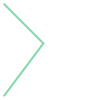

In [77]:
#Criando geometria do tipo linha

ponto1 = Point(2,3)
ponto2 = Point(5,7)
ponto3 = Point(2,10)

linha = LineString([ponto1,ponto2,ponto3])

linha

In [78]:
# Tipo da variavel
print(linha, type(linha))

LINESTRING (2 3, 5 7, 2 10) <class 'shapely.geometry.linestring.LineString'>


In [81]:
# Atributos e funções da linestring

#Funçao coords (Extrair as coordenadas)
list(linha.coords)

# lendo x e y separadamente
x = list(linha.xy[0])
y = list(linha.xy[1])

print(f'Coordenadas X: {x}, Coordenadas Y: {y}')

Coordenadas X: [2.0, 5.0, 2.0], Coordenadas Y: [3.0, 7.0, 10.0]


In [82]:
#Calcular o comprimento da linha
linha.length

9.242640687119284

In [83]:
# Obter o ponto central (centroide)
print(linha.centroid)

POINT (3.5000000000000004 6.606601717798214)


#### 6.3. Polygon (Poligono)

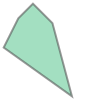

In [113]:
#Criando geometria do tipo poligono
polygon = Polygon([(2,1),(5,7),(8,10),(12,6),(16,-9)])
polygon

In [114]:
# Tipo da variavel
print(polygon, type(polygon))

POLYGON ((2 1, 5 7, 8 10, 12 6, 16 -9, 2 1)) <class 'shapely.geometry.polygon.Polygon'>


In [115]:
#obter as coordenadas
polygon.exterior.coords

In [116]:
# calcular area
area = polygon.area

print(f"A area do poligon é: {area}")

A area do poligon é: 119.5


In [118]:
# obter o centroide do poligon
polygon_centroid = polygon.centroid

print(f'Centroide: {polygon_centroid}')

Centroide: POINT (9.142259414225942 1.1743375174337518)


In [119]:
# obter as coordenadas da bounding box
polygon.bounds

(2.0, -9.0, 16.0, 10.0)

In [122]:
# pegar as coordenadas da linha exterior
polygon_exter = polygon.exterior
print(polygon_exter)

LINEARRING (2 1, 5 7, 8 10, 12 6, 16 -9, 2 1)


In [124]:
# obter o tamanho da linha exterior (PERIMETRO)
polygon_perimetro = polygon.exterior.length

print(f'O perimetro do poligono: {polygon_perimetro}')

O perimetro do poligono: 49.33652409945631


### 7. Operações básicas entre geometrias ( Ferramentas de Geoprocessamento)

#### 7.1. BUFFER

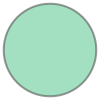

In [126]:
# Criar circulos (BUFFER)
buffer1 = Point(1,1).buffer(1)
buffer1

#### 7.2 INTERSEÇÃO   


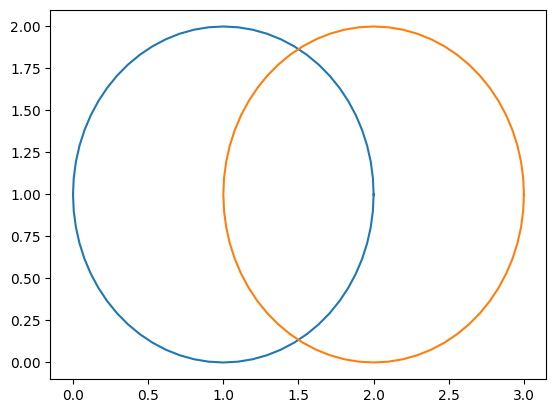

In [127]:
# Criar dois poligonos para usar como exemplo
circulo1 = Point(1,1).buffer(1)
circulo2 = Point(2,1).buffer(1)

## Plotar os poligonos
x,y= circulo1.exterior.xy
plt.plot(x,y)

x,y = circulo2.exterior.xy
plt.plot(x,y)

plt.show()

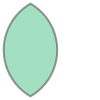

In [129]:
# Fazendo a Interseção
circulo_inter = circulo1.intersection(circulo2)
circulo_inter

#### 7.3. UNIÃO

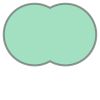

In [132]:
circulo_union = circulo1.union(circulo2)

circulo_union

#### 7.4. DIFERENÇA

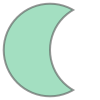

In [133]:
circulo_dif1 = circulo1.difference(circulo2)
circulo_dif1

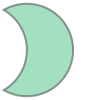

In [134]:
circulo_dif2 = circulo2.difference(circulo1)
circulo_dif2

#### 7.5. DIFERENÇA SIMETRICA

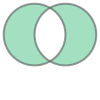

In [135]:
circulo_dif_1 = circulo1.symmetric_difference(circulo2)
circulo_dif_1